### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 
### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

### Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

### Content: 

Dataset columns and definition:

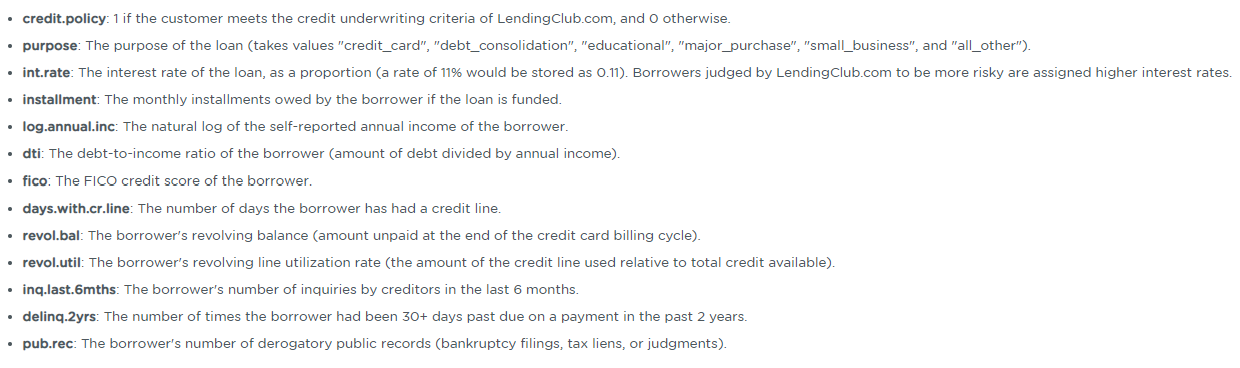

# Import Libraries/modules

In [981]:
import os
import pandas as pd
import numpy as np

# For Warnings
import warnings
warnings.simplefilter("ignore")

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

#For Data Balancing
from sklearn.utils import resample
from sklearn.utils import shuffle

#For Training Model
from sklearn.model_selection import train_test_split

#For data Normalization
from sklearn.preprocessing import StandardScaler

#For Modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'tensorflow'

In [873]:
# This prints the notebook location
os.getcwd()

'C:\\Users\\shaz5\\Desktop\\Learn\\AI\\Course\\Class 5 Deep Learning\\Project\\Lending Club Loan Data Analysis'

In [874]:
# Print all the filen names in the folder
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'loan_data.csv',
 'Project_1_Loan_defaulter_SL.ipynb',
 'Requirement.docx',
 'Untitled.ipynb',
 '~$quirement.docx']

# load the dataset in panda dataframe

In [875]:
#import the cep1_dataset dataset xlsx into the panda dataframe#

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [876]:
df.values

array([[1, 'debt_consolidation', 0.1189, ..., 0, 0, 0],
       [1, 'credit_card', 0.1071, ..., 0, 0, 0],
       [1, 'debt_consolidation', 0.1357, ..., 0, 0, 0],
       ...,
       [0, 'debt_consolidation', 0.1071, ..., 0, 0, 1],
       [0, 'home_improvement', 0.16, ..., 0, 0, 1],
       [0, 'debt_consolidation', 0.1392, ..., 0, 0, 1]], dtype=object)

## Pre-liminary Analysis

##### Structure of the Dataset

In [877]:
df.shape

(9578, 14)

##### Datatype of Columns

In [878]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

##### check column names

In [879]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

##### check indexes

In [880]:
df.index

RangeIndex(start=0, stop=9578, step=1)

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### Identify missing records

In [882]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

##### Identify duplicate records

In [883]:
df[df.duplicated(keep=False)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


##### Look into Sample data

In [884]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


##### Look into Unique records

In [885]:
for i in df.columns:
    print("'{}' column has below unique records\n".format(i))
    print(df[i].sort_values(inplace=False).unique())
    print("\n")

'credit.policy' column has below unique records

[0 1]


'purpose' column has below unique records

['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


'int.rate' column has below unique records

[0.06   0.0639 0.0676 0.0705 0.0712 0.0714 0.0737 0.074  0.0743 0.0751
 0.0768 0.0774 0.0775 0.0788 0.08   0.0807 0.0832 0.0838 0.0859 0.0863
 0.087  0.0894 0.0901 0.0907 0.092  0.0932 0.0933 0.0938 0.0945 0.0951
 0.0963 0.0964 0.097  0.0976 0.0983 0.0988 0.0996 0.1001 0.1008 0.1014
 0.102  0.1025 0.1028 0.1033 0.1039 0.1046 0.1051 0.1059 0.1062 0.1064
 0.1071 0.1078 0.1083 0.1091 0.1095 0.1096 0.1099 0.1103 0.1109 0.1114
 0.1122 0.1126 0.1128 0.1134 0.1136 0.1141 0.1146 0.1148 0.1154 0.1158
 0.1159 0.1166 0.1172 0.1178 0.1183 0.1186 0.1189 0.1191 0.1197 0.1204
 0.1209 0.1217 0.1218 0.1221 0.1222 0.1229 0.1236 0.1241 0.1249 0.1253
 0.1254 0.1261 0.1267 0.1272 0.1273 0.128  0.1284 0.1286 0.1287 0.1292
 0.1299 0.1304 0.1311 0.131

In [886]:
df.nunique(axis=0)

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

##### Check Data balance

In [887]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

**Analysis:

* Data is imblanced which needs to be balanced
* There are no duplicate records in dataset
* There are no null records in dataset
* The 'purpose' field is of object type this needs to be convert into disrete/numerical values

# Task 1.Feature Transformation:

•	Transform categorical values into numerical values (discrete)

In [890]:
df1 = pd.get_dummies(df, columns=['purpose'])
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [892]:
Categorical_Features = []
Continious_Features = []
for column in df1.columns:
    if column != 'not.fully.paid':
        if len(df1[column].unique()) <= 12:
            Categorical_Features.append(column)
        else:
            Continious_Features.append(column)
        
        
print("\n Categorical Variables are : " , Categorical_Features)
print(" \n Continiuous Variables are : " , Continious_Features)


 Categorical Variables are :  ['credit.policy', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
 
 Continiuous Variables are :  ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']


* Categorical Variables are 'credit.policy', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business'

* 'purpose' field was of object datatype which was converted into discrete values

# Task 2. Exploratory data analysis of different factors of the dataset

##### handle imbalanced dataset

In [893]:
display(
    df1['not.fully.paid'].value_counts(),
    df1['not.fully.paid'].value_counts(normalize=True)*100
)

0    8045
1    1533
Name: not.fully.paid, dtype: int64

0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64

Count for Target 

  0    8045
1    1533
Name: not.fully.paid, dtype: int64 


 Percentage for Target 
  0    83.994571
1    16.005429
Name: not.fully.paid, dtype: float64 



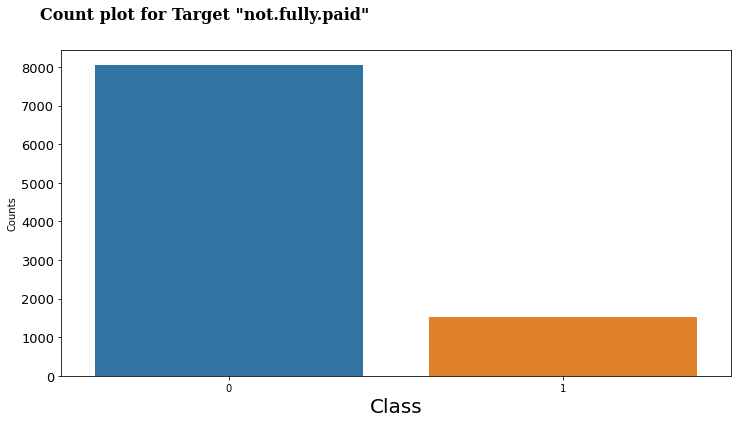

In [894]:
print("Count for Target \n\n ",df1['not.fully.paid'].value_counts(),'\n' )
print("\n Percentage for Target \n ",df1['not.fully.paid'].value_counts(normalize=True)*100,'\n' )

fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.countplot(data= df1, x='not.fully.paid')
fig.text(0.1, 0.95, f'Count plot for Target "not.fully.paid"', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('Class', fontsize=20)
plt.ylabel('Counts')
plt.yticks(fontsize=13)
plt.show()

In [895]:
not_fully_paid_0 = df1[df1['not.fully.paid'] == 0]
not_fully_paid_1 = df1[df1['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 20)
not_fully_paid_1 (1533, 20)


In [896]:
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df1 = pd.concat([not_fully_paid_0, df_minority_upsampled])

df1 = shuffle(df1)

In [897]:
df1['not.fully.paid'].value_counts()  

1    8045
0    8045
Name: not.fully.paid, dtype: int64

### Data Exploration

##### Data Inspection for Continious Featues

In [898]:
df1[Continious_Features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
int.rate,16090.0,0.126581,0.026702,0.060000,0.110300,0.126100,0.143800,2.164000e-01
installment,16090.0,327.347889,214.429309,15.670000,165.775000,275.140000,458.850000,9.401400e+02
log.annual.inc,16090.0,10.914426,0.638655,7.547502,10.518673,10.915088,11.289782,1.452835e+01
dti,16090.0,12.838869,6.947791,0.000000,7.360000,12.940000,18.310000,2.996000e+01
fico,16090.0,705.421069,36.819498,612.000000,677.000000,702.000000,727.000000,8.270000e+02
days.with.cr.line,16090.0,4483.041048,2466.808963,178.958333,2789.958333,4109.958333,5669.958333,1.763996e+04
revol.bal,16090.0,18750.383592,39426.866037,0.000000,3273.000000,8793.000000,19507.000000,1.207359e+06
revol.util,16090.0,49.078635,29.074182,0.000000,25.400000,49.800000,73.200000,1.190000e+02
inq.last.6mths,16090.0,1.888440,2.537490,0.000000,0.000000,1.000000,3.000000,3.300000e+01


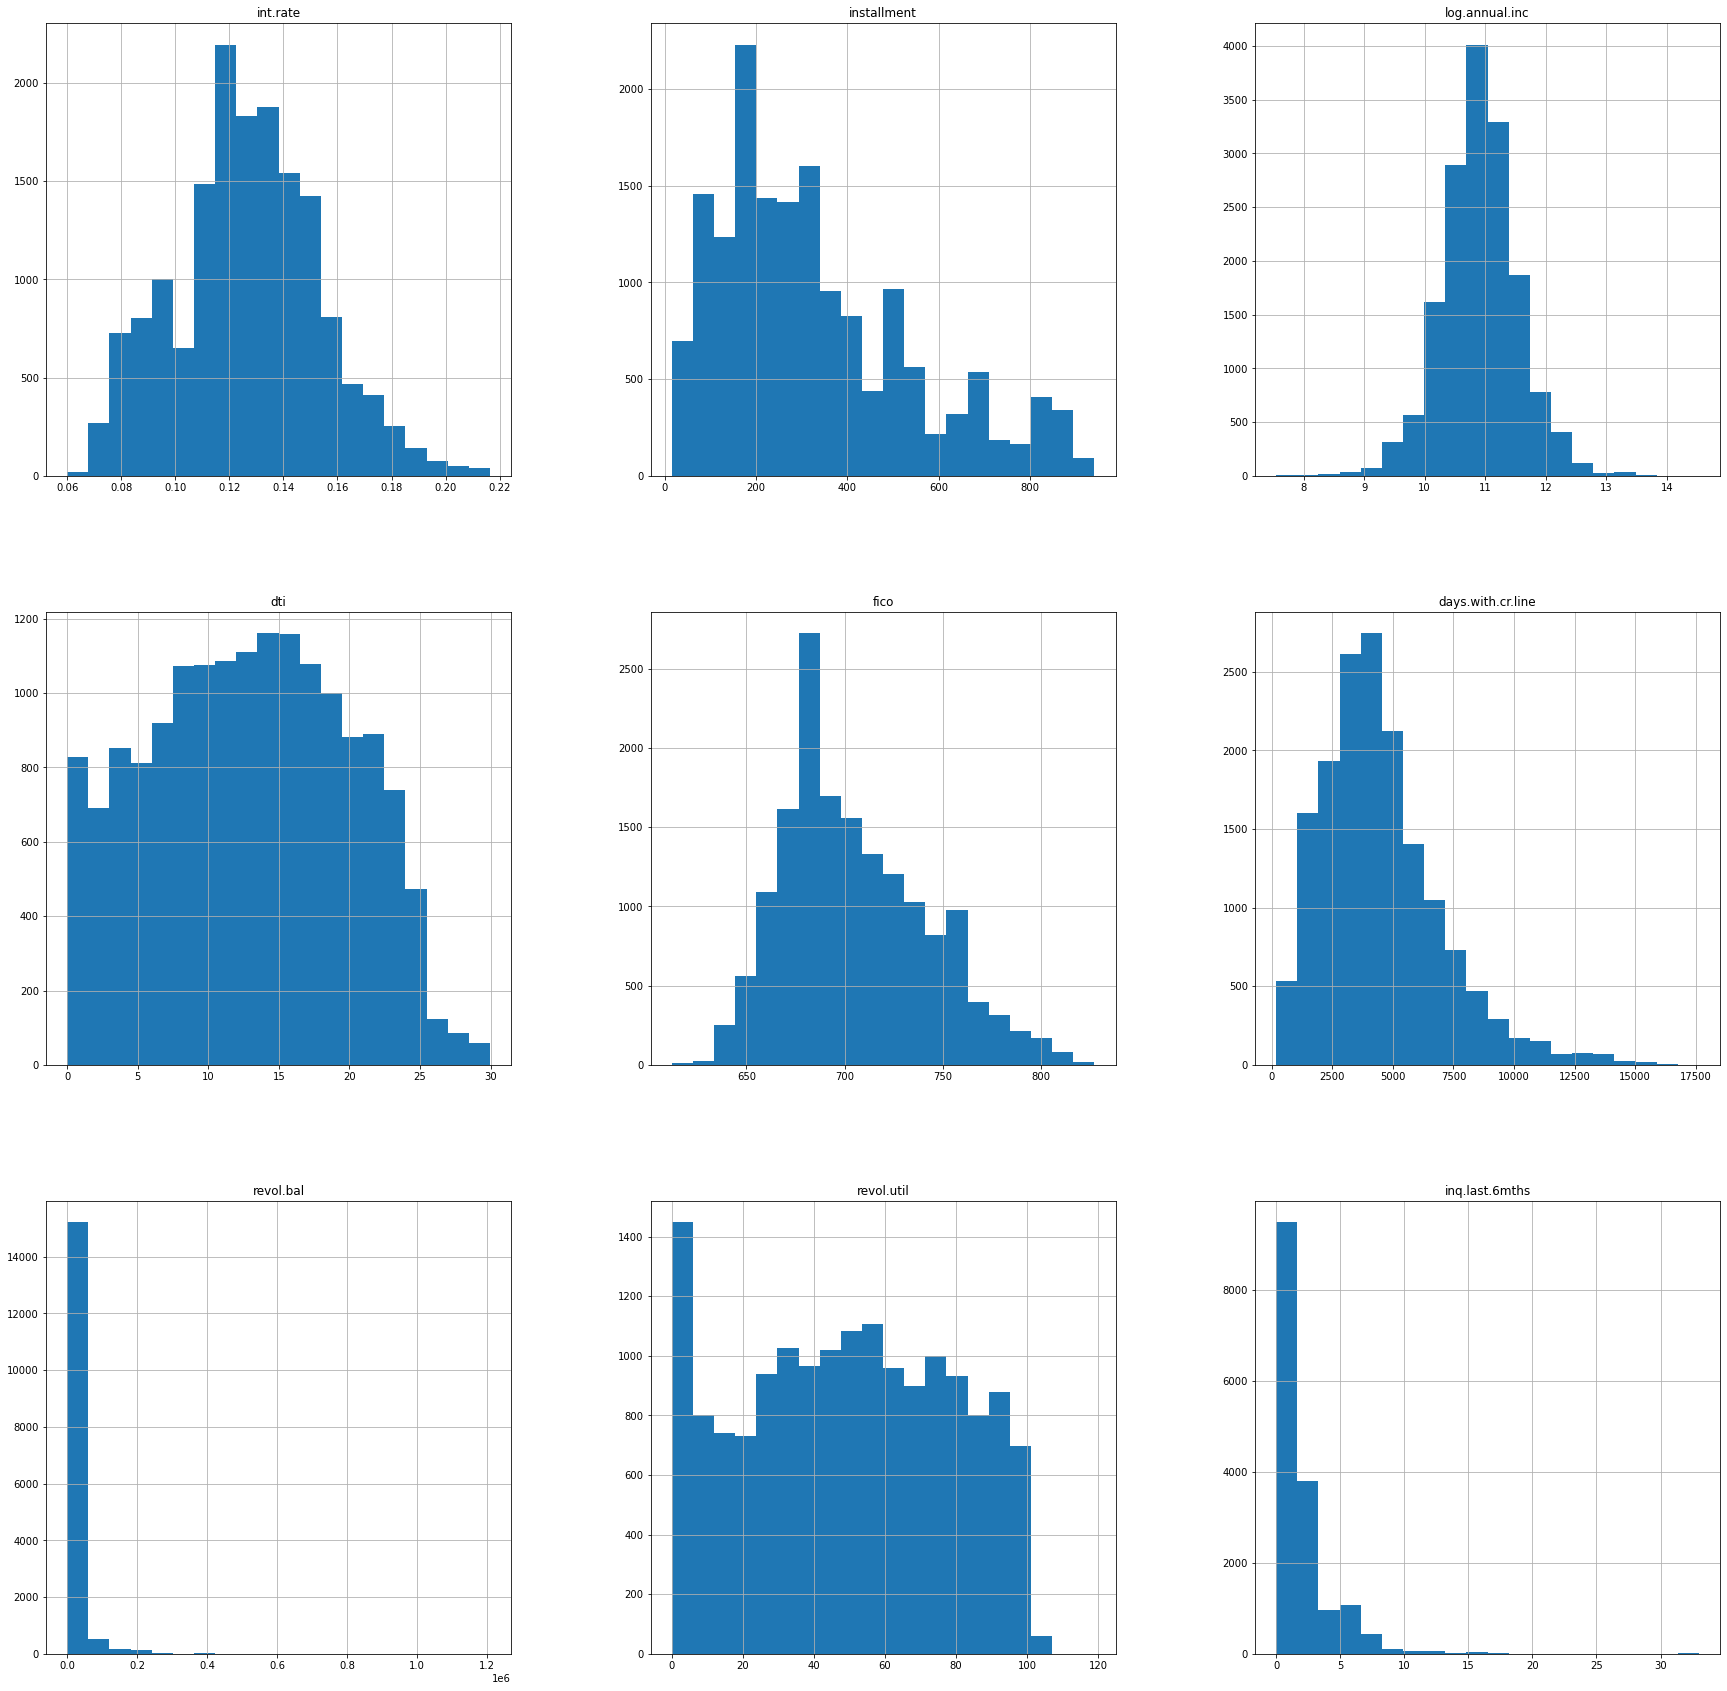

In [899]:
# Check the distribution of the continous Features
df1[Continious_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

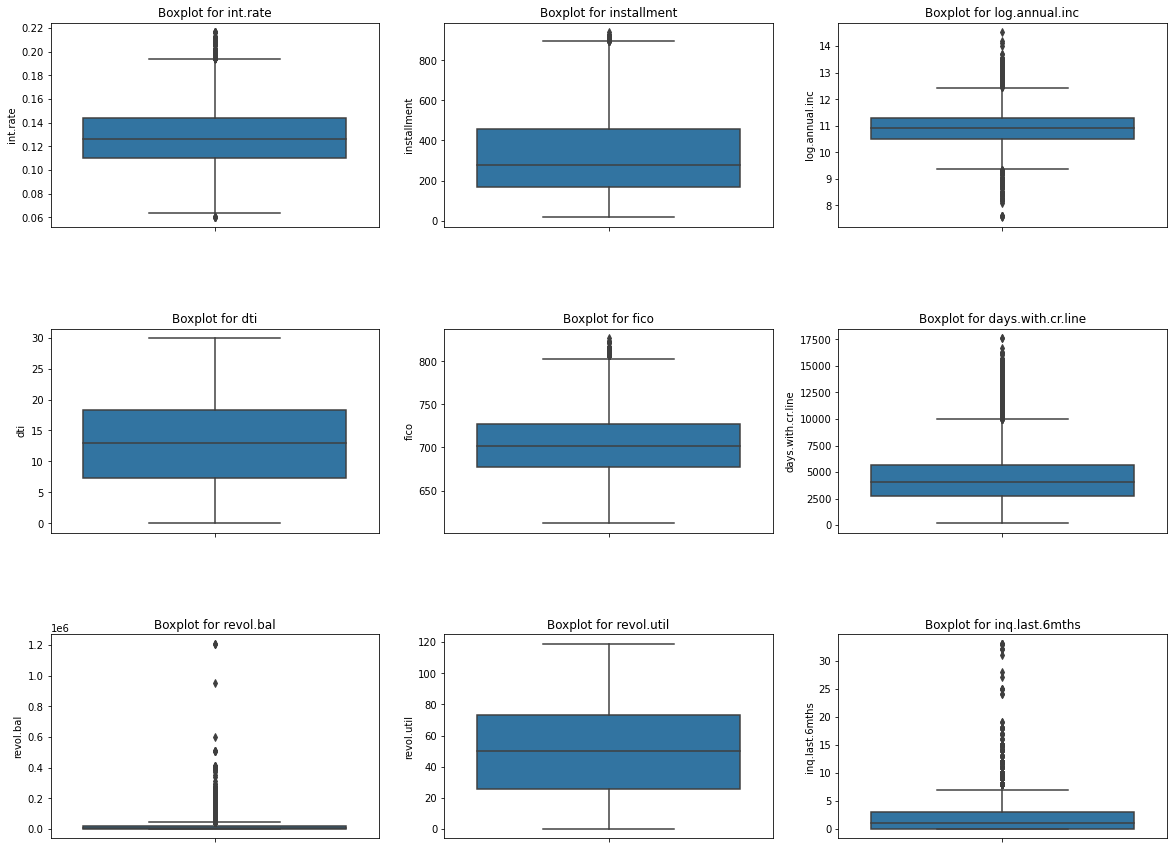

In [901]:
# Create plots showing the uncertainity in the data and the outliers.

# Define subplot grid
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(df1[Continious_Features]):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = df1[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

##### Summary of the statistical data above

* The feature revol.bal (The borrower's revolving line utilization rate) has the highest standard deviation and so, it expected that this variable will contain outliers.
* Other features such as days.with.cr.line, installment, fico, and revol.util also show high standard deviations, as such, outliers in this data have to be detect and handled.
* The highest number of days the borrower has had a credit line (days.with.cr.line) was 17640 days.

* Above histogram shows that features such as revol.bal, days.with.cr.line, installment, fico, and revol.util,inq.last.6mths may contain outliers because they are all positively skewed.
* From the boxplot above, it can be seen that the outliers exist in the variables such as the following: int.rate, installment, log.annual.inc, fico, days.with.cr.line , revol.bal , inq.last.6mths. These outliers will be handles later.

##### Data Inspection for Categorical Columns

In [903]:
df1[Categorical_Features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,16090.0,0.745681,0.435492,0.0,0.0,1.0,1.0,1.0
delinq.2yrs,16090.0,0.167185,0.532391,0.0,0.0,0.0,0.0,13.0
pub.rec,16090.0,0.074891,0.276580,0.0,0.0,0.0,0.0,5.0
purpose_all_other,16090.0,0.249596,0.432793,0.0,0.0,0.0,0.0,1.0
purpose_credit_card,16090.0,0.115227,0.319305,0.0,0.0,0.0,0.0,1.0
purpose_debt_consolidation,16090.0,0.406899,0.491271,0.0,0.0,0.0,1.0,1.0
purpose_educational,16090.0,0.039528,0.194853,0.0,0.0,0.0,0.0,1.0
purpose_home_improvement,16090.0,0.064201,0.245119,0.0,0.0,0.0,0.0,1.0
purpose_major_purchase,16090.0,0.042324,0.201335,0.0,0.0,0.0,0.0,1.0
purpose_small_business,16090.0,0.082225,0.274716,0.0,0.0,0.0,0.0,1.0


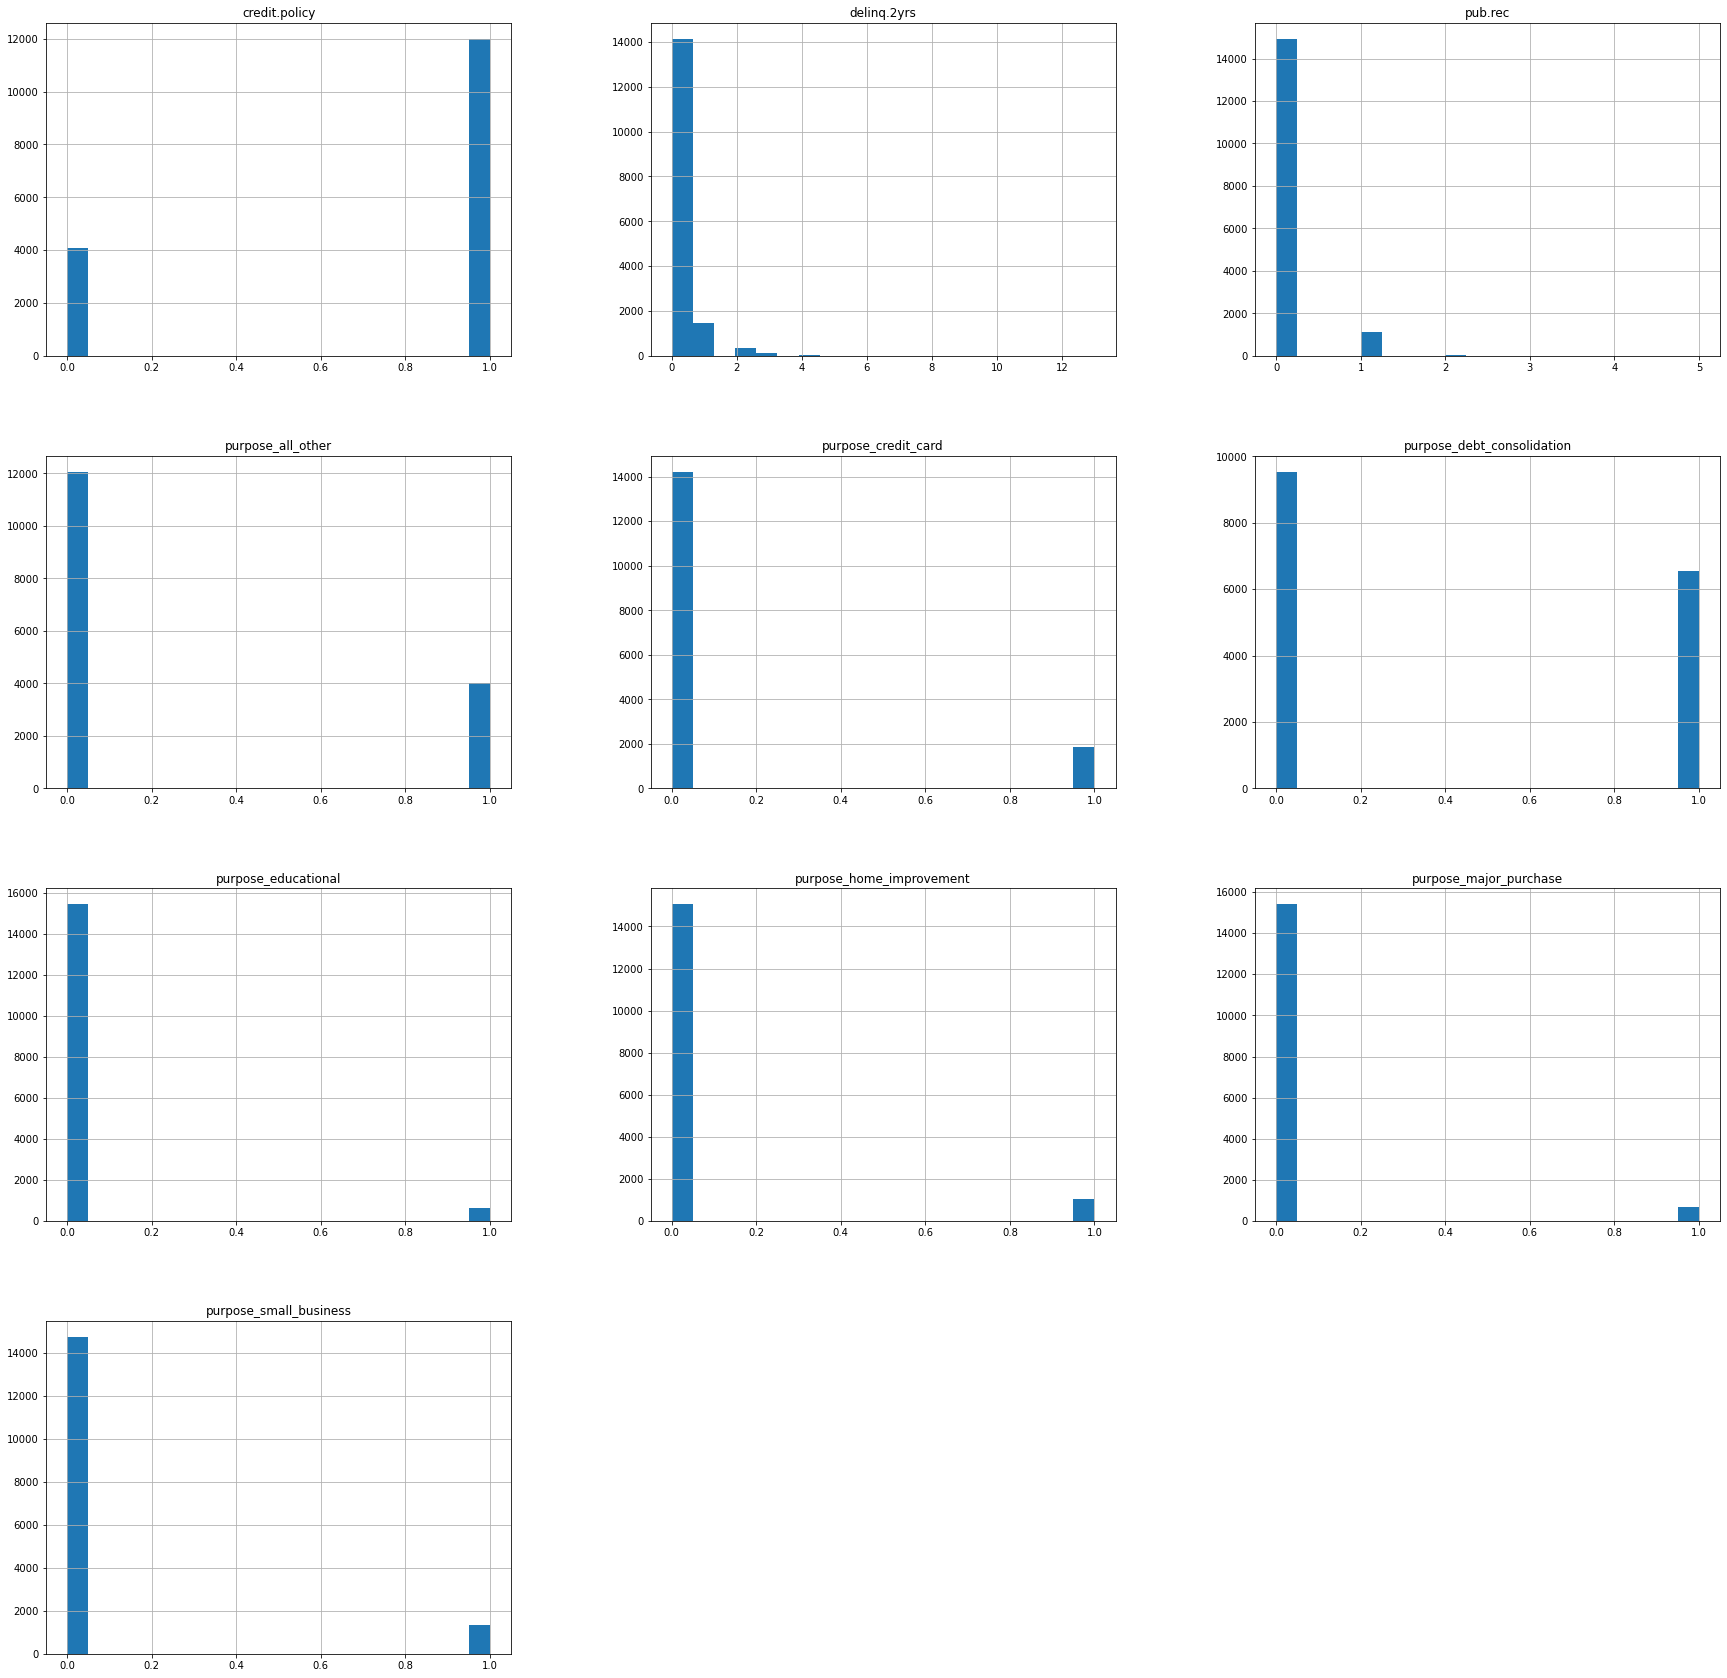

In [904]:
# Check the distribution of the categorical data
df1[Categorical_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

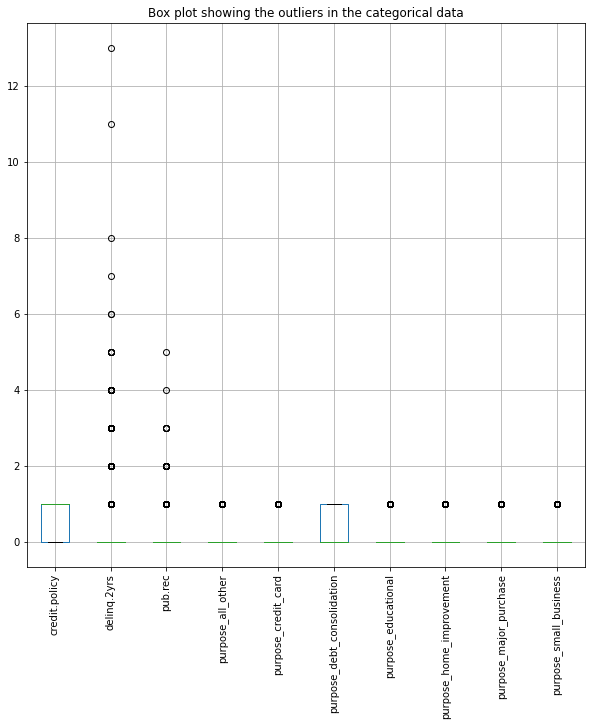

In [905]:
# Create plots showing the uncertainity in the categorical data and the outliers.
plt.figure(figsize = (10, 10))
df1[Categorical_Features].boxplot()
plt.xticks(rotation = 90)
plt.title("Box plot showing the outliers in the categorical data")
plt.show()

#### credit.policy

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

<Figure size 792x504 with 0 Axes>

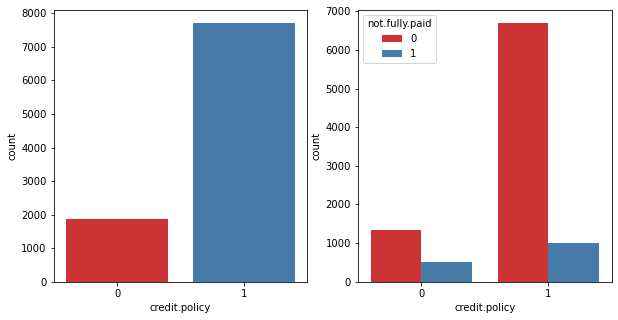

In [906]:
plt.figure(figsize=(11,7))
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = True)
sns.countplot(x='credit.policy',data=df,palette='Set1',ax=axs[0])
sns.countplot(x='credit.policy',hue='not.fully.paid',data=df,palette='Set1',ax=axs[1])

#### PURPOSE

<AxesSubplot:xlabel='purpose', ylabel='count'>

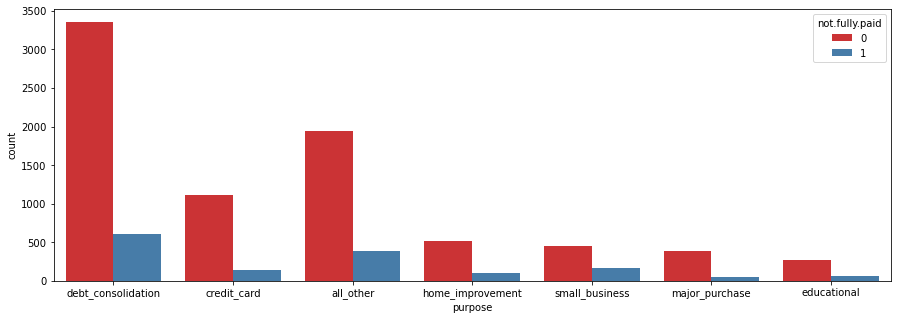

In [907]:
plt.figure(figsize=(15,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

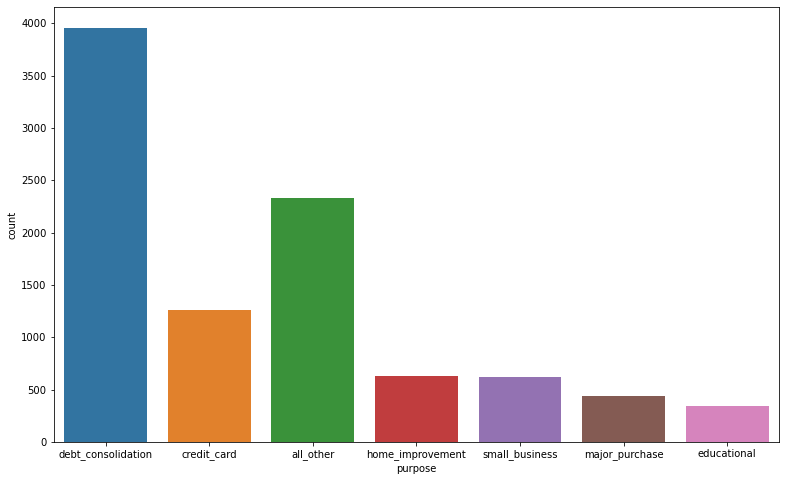

In [908]:
plt.figure(figsize=(13,8))
sns.countplot(df['purpose'])
plt.show()

##### delinq.2yrs

Text(0.5, 0, 'delinq.2yrs')

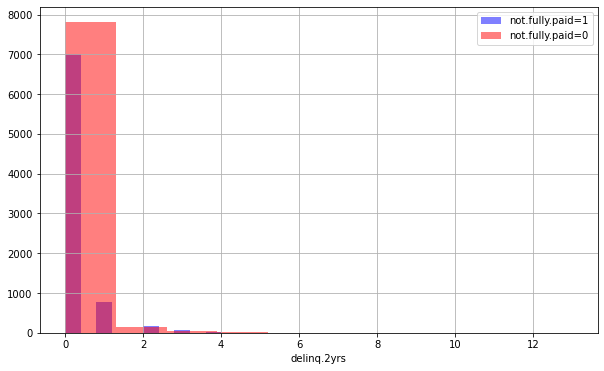

In [909]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['delinq.2yrs'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['delinq.2yrs'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('delinq.2yrs')

<AxesSubplot:xlabel='delinq.2yrs', ylabel='count'>

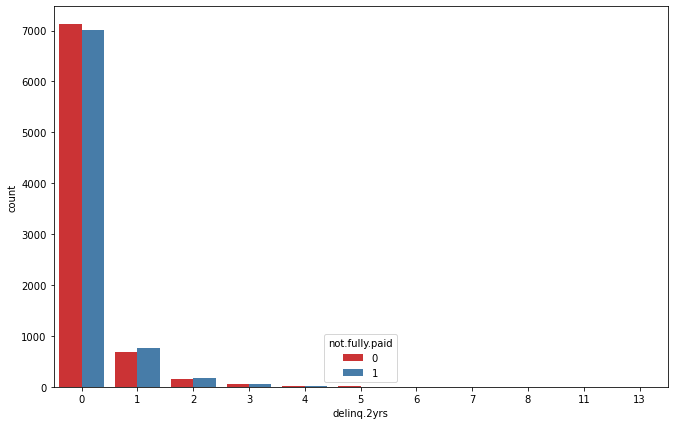

In [910]:
plt.figure(figsize=(11,7))
sns.countplot(x='delinq.2yrs',hue='not.fully.paid',data=df1,palette='Set1')

#### pub.rec

<AxesSubplot:xlabel='pub.rec', ylabel='count'>

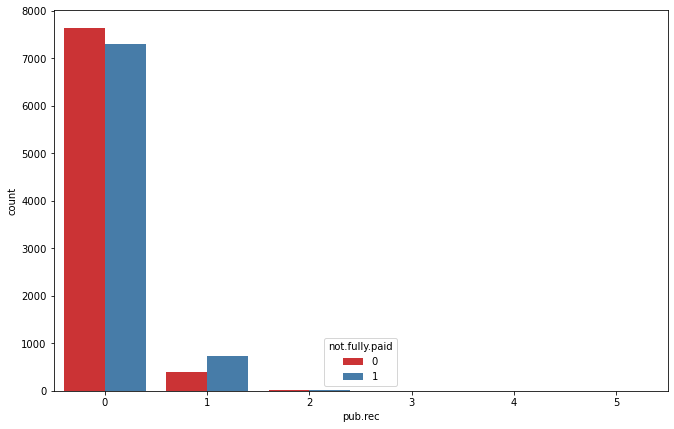

In [911]:
plt.figure(figsize=(11,7))
sns.countplot(x='pub.rec',hue='not.fully.paid',data=df1,palette='Set1')

Text(0.5, 0, 'pub.rec')

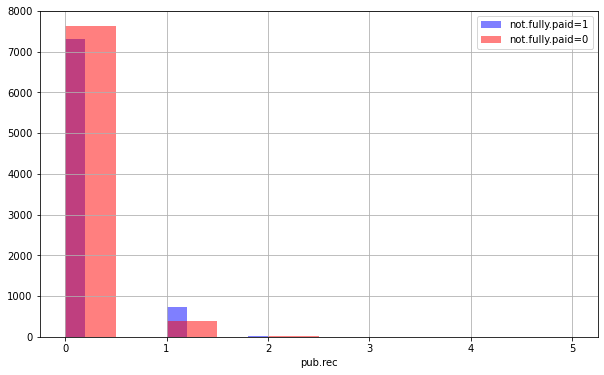

In [912]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['pub.rec'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['pub.rec'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('pub.rec')

#### Analysis:

* It can be seen that most of the categorical data is positively skewed.
* Most clients satisfied the credit policy.
* Most clients decided to take the loan for purposes of loan consolidation.
* The graph shown above indicates that outliers exist in all variables of categorical data.

##### Check Continious/ Numerical columns

#### FICO

Text(0.5, 0, 'FICO')

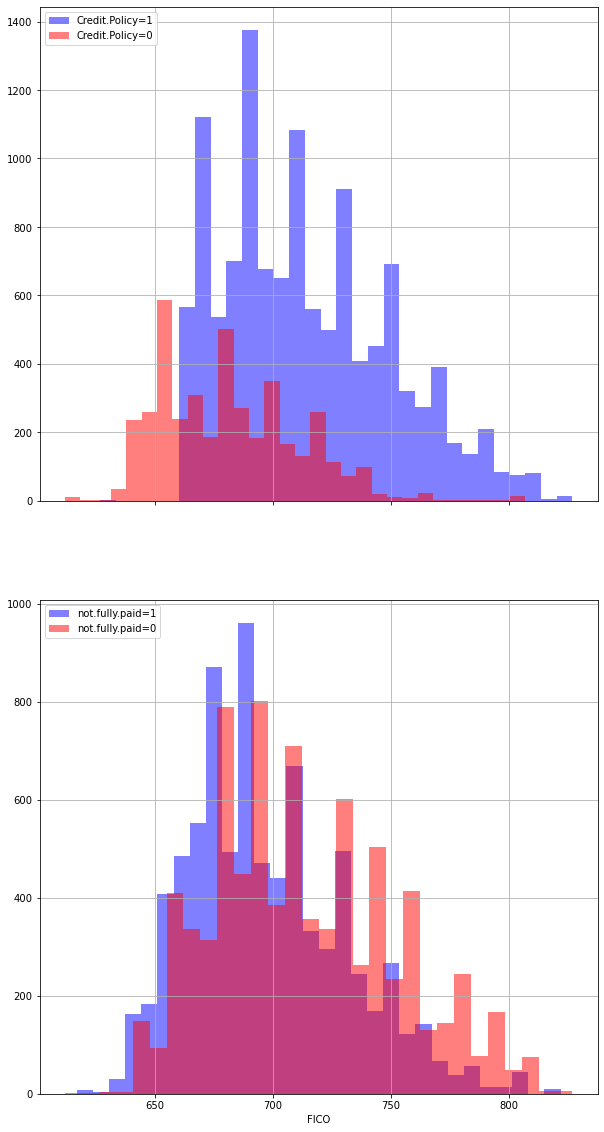

In [913]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 20), sharex = True)


df1[df1['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1',ax=axs[0])
df1[df1['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0',ax=axs[0])
axs[0].legend(loc='upper left')

df1[df1['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1',ax=axs[1])
df1[df1['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0',ax=axs[1])
axs[1].legend(loc='upper left')

plt.xlabel('FICO')

#### int.rate

Text(0.5, 0, 'int.rate')

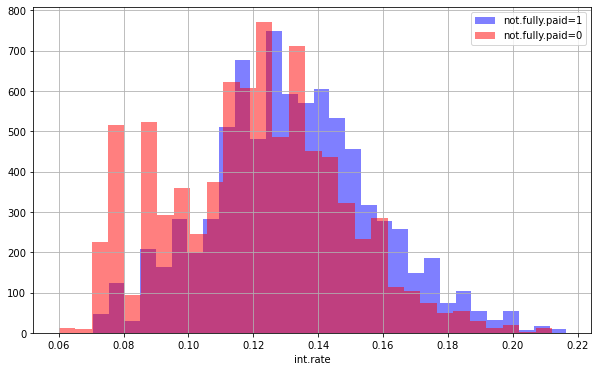

In [914]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['int.rate'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['int.rate'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('int.rate')

<Figure size 792x504 with 0 Axes>

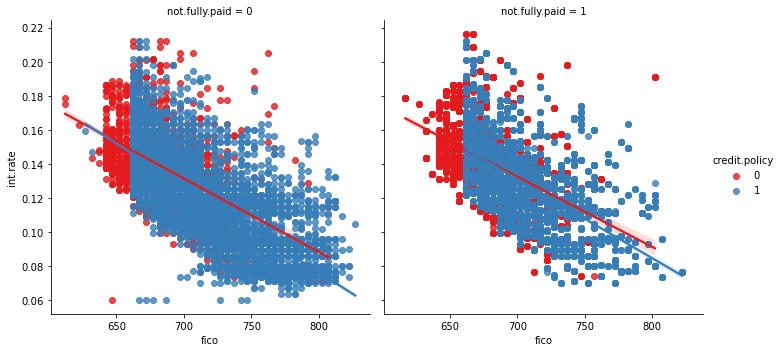

In [915]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df1,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

#### installment

Text(0.5, 0, 'Installment')

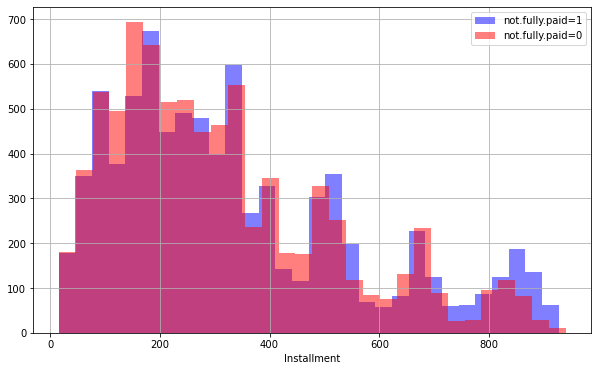

In [916]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['installment'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['installment'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Installment')

#### revol.bal

Text(0.5, 0, 'revol.bal')

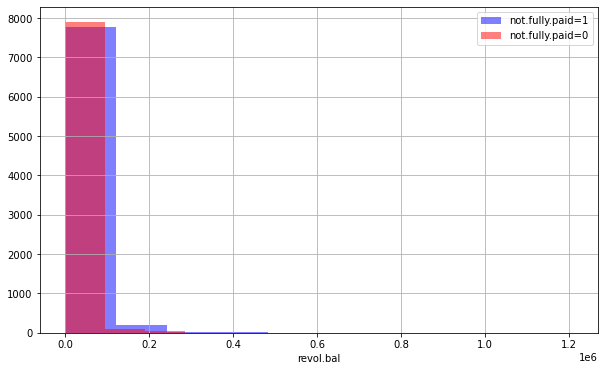

In [917]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['revol.bal'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['revol.bal'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

<AxesSubplot:>

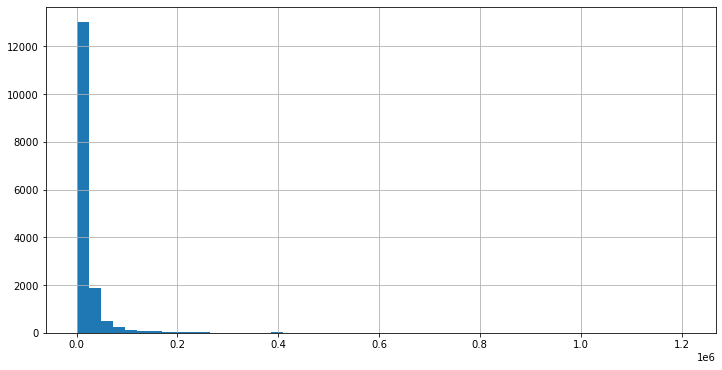

In [918]:
df1['revol.bal'].hist(figsize=[12,6], bins=50)

#### revol.util

Text(0.5, 0, 'revol.util')

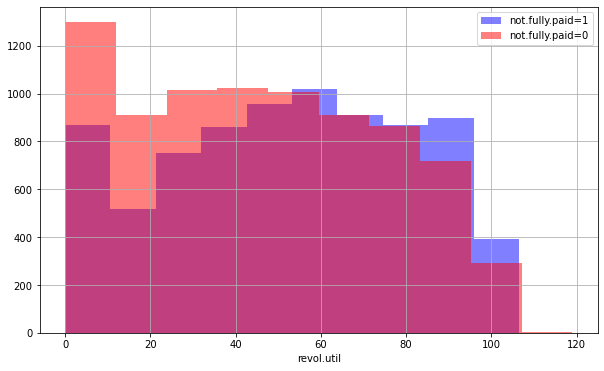

In [919]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['revol.util'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['revol.util'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

#### inq.last.6mths

Text(0.5, 0, 'inq.last.6mths')

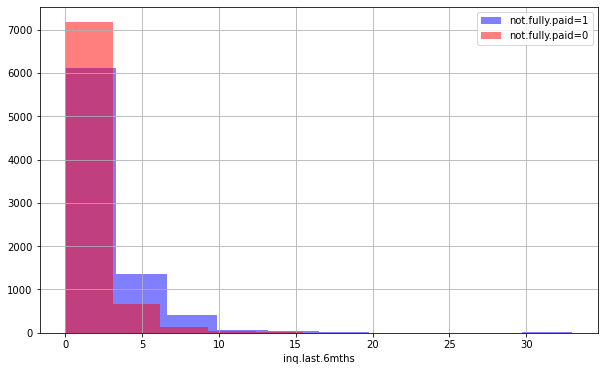

In [920]:
plt.figure(figsize=(10,6))
df1[df1['not.fully.paid']==1]['inq.last.6mths'].hist(alpha=0.5,color='blue',bins=10,label='not.fully.paid=1')
df1[df1['not.fully.paid']==0]['inq.last.6mths'].hist(alpha=0.5,color='red', bins=10,label='not.fully.paid=0')
plt.legend()
plt.xlabel('inq.last.6mths')

<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

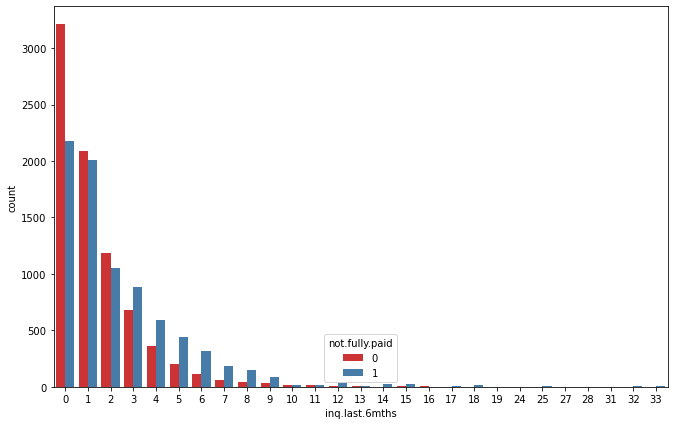

In [921]:
plt.figure(figsize=(11,7))
sns.countplot(x='inq.last.6mths',hue='not.fully.paid',data=df1,palette='Set1')

## DATA WRANGLING

In this section, data will be wrangled in the sense that all missing values will handled in both
numerical and categorical data. Outliers in the numerical and categorical data will be eliminated so that
the data can produce an improved result in the prediction model at a faster time.

#####  Handling missing values in the data frame

In [922]:
df1.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

There are no missing records hence no need to perform missing value treatment

##### Handling outliers and skewness in the numerical variable of our data set.

In [923]:
# Detect outliers in combined data set
def detect_outlier(feature):
    outliers = []
    data = df1[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print(f"\noutlier caps for {feature}")
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i > data.quantile(.99)])))

In [924]:
# Determine what the upperbound should be for continuous features in dataframe.
for feat in Continious_Features:
    detect_outlier(feat)


outlier caps for int.rate


KeyboardInterrupt: 

In [926]:
# Capping features in df1 to remover outliers in numerical features

for var in Continious_Features:
    df1[var].clip(lower = df1[var].quantile(.05),upper=df1[var].quantile(0.95), inplace=True)

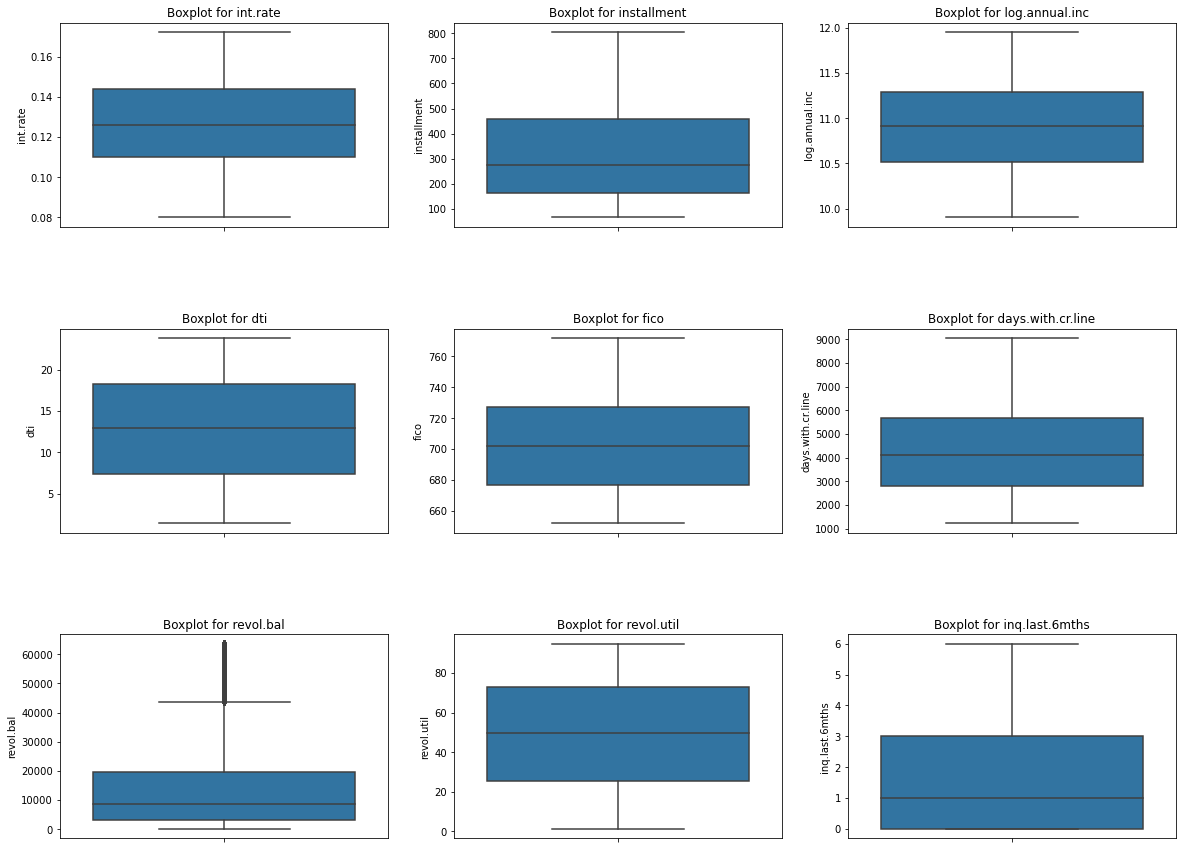

In [927]:
# Check for the presence of outliers in the numerical data of the dataframe again

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15), sharex = True)
fig.subplots_adjust(hspace = 0.5)


for i, col in enumerate(df1[Continious_Features]):
    ax = plt.subplot(3, 3, i+1)
    sns.boxplot(y = df1[col])
    ax.set_title(f"Boxplot for {col}")
plt.show()

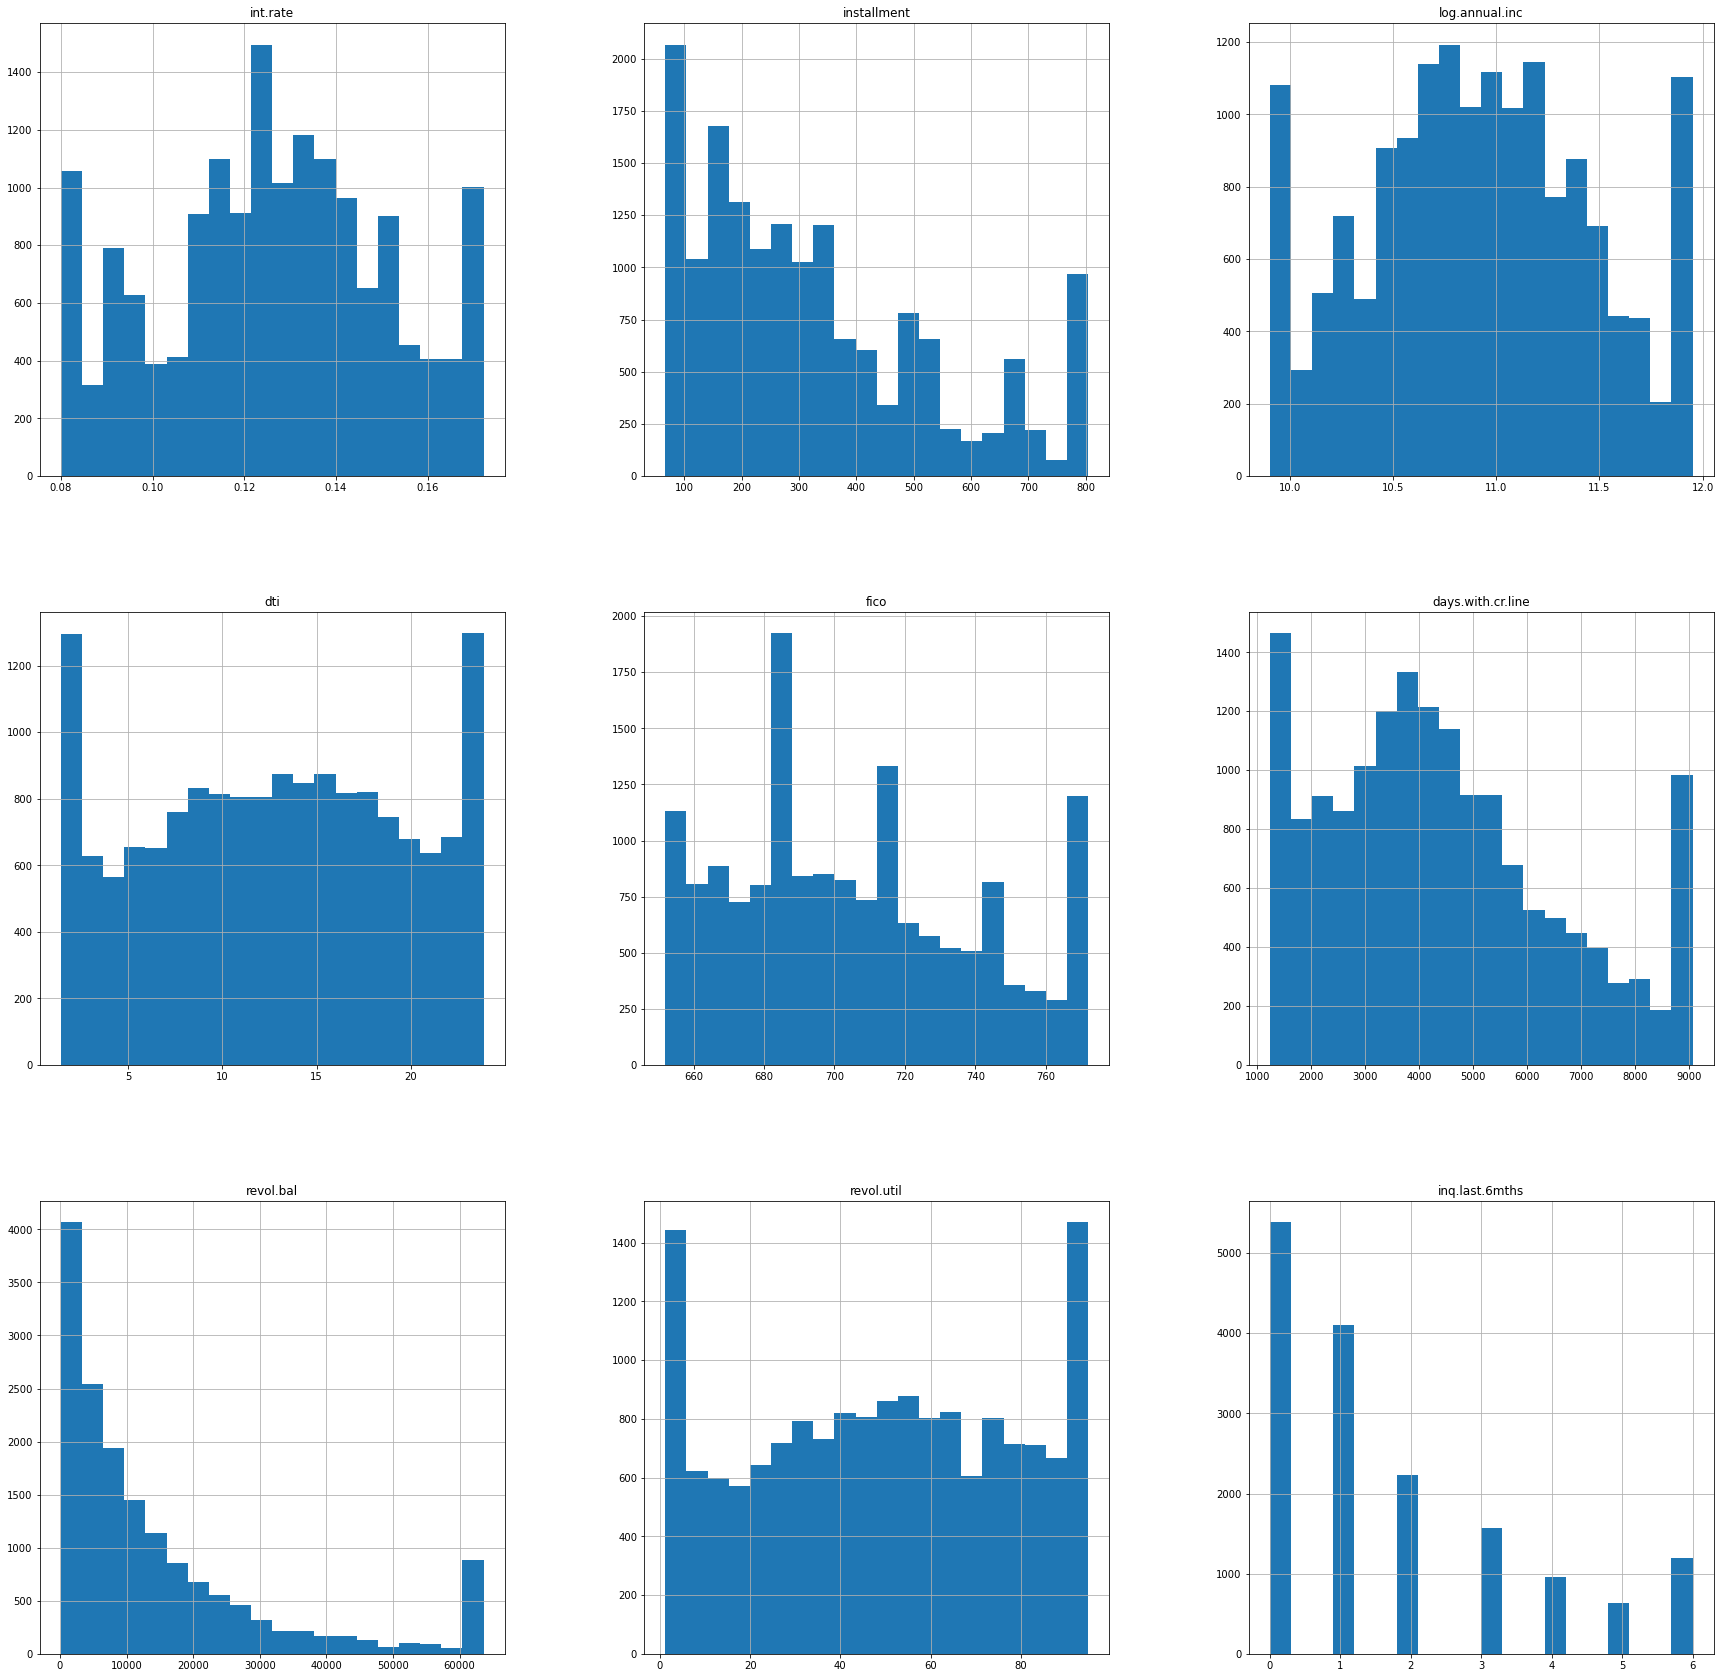

In [928]:
df1[Continious_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

#### Fix the skewness in the numerical data of the dataframe

In [929]:
# Check for skewness in the numerical features
vars_skewed = df1[Continious_Features].skew().sort_values(ascending = False)

high_skew = vars_skewed[abs(vars_skewed) > 0.3]
display (vars_skewed,high_skew)

revol.bal            1.681547
inq.last.6mths       1.033296
installment          0.831392
days.with.cr.line    0.539632
fico                 0.388169
log.annual.inc       0.032119
dti                 -0.040586
revol.util          -0.054680
int.rate            -0.055098
dtype: float64

revol.bal            1.681547
inq.last.6mths       1.033296
installment          0.831392
days.with.cr.line    0.539632
fico                 0.388169
dtype: float64

In [930]:
for featu in high_skew.index:
    df1[featu] = np.log1p(df1[featu])

In [931]:
# Check for skewness in the numerical features
vars_skewed = df1[Continious_Features].skew().sort_values(ascending = False)

high_skew = vars_skewed[abs(vars_skewed) > 0.3]
display (vars_skewed,high_skew)

fico                 0.314550
inq.last.6mths       0.222925
log.annual.inc       0.032119
dti                 -0.040586
revol.util          -0.054680
int.rate            -0.055098
installment         -0.264385
days.with.cr.line   -0.451935
revol.bal           -0.924860
dtype: float64

fico                 0.314550
days.with.cr.line   -0.451935
revol.bal           -0.924860
dtype: float64

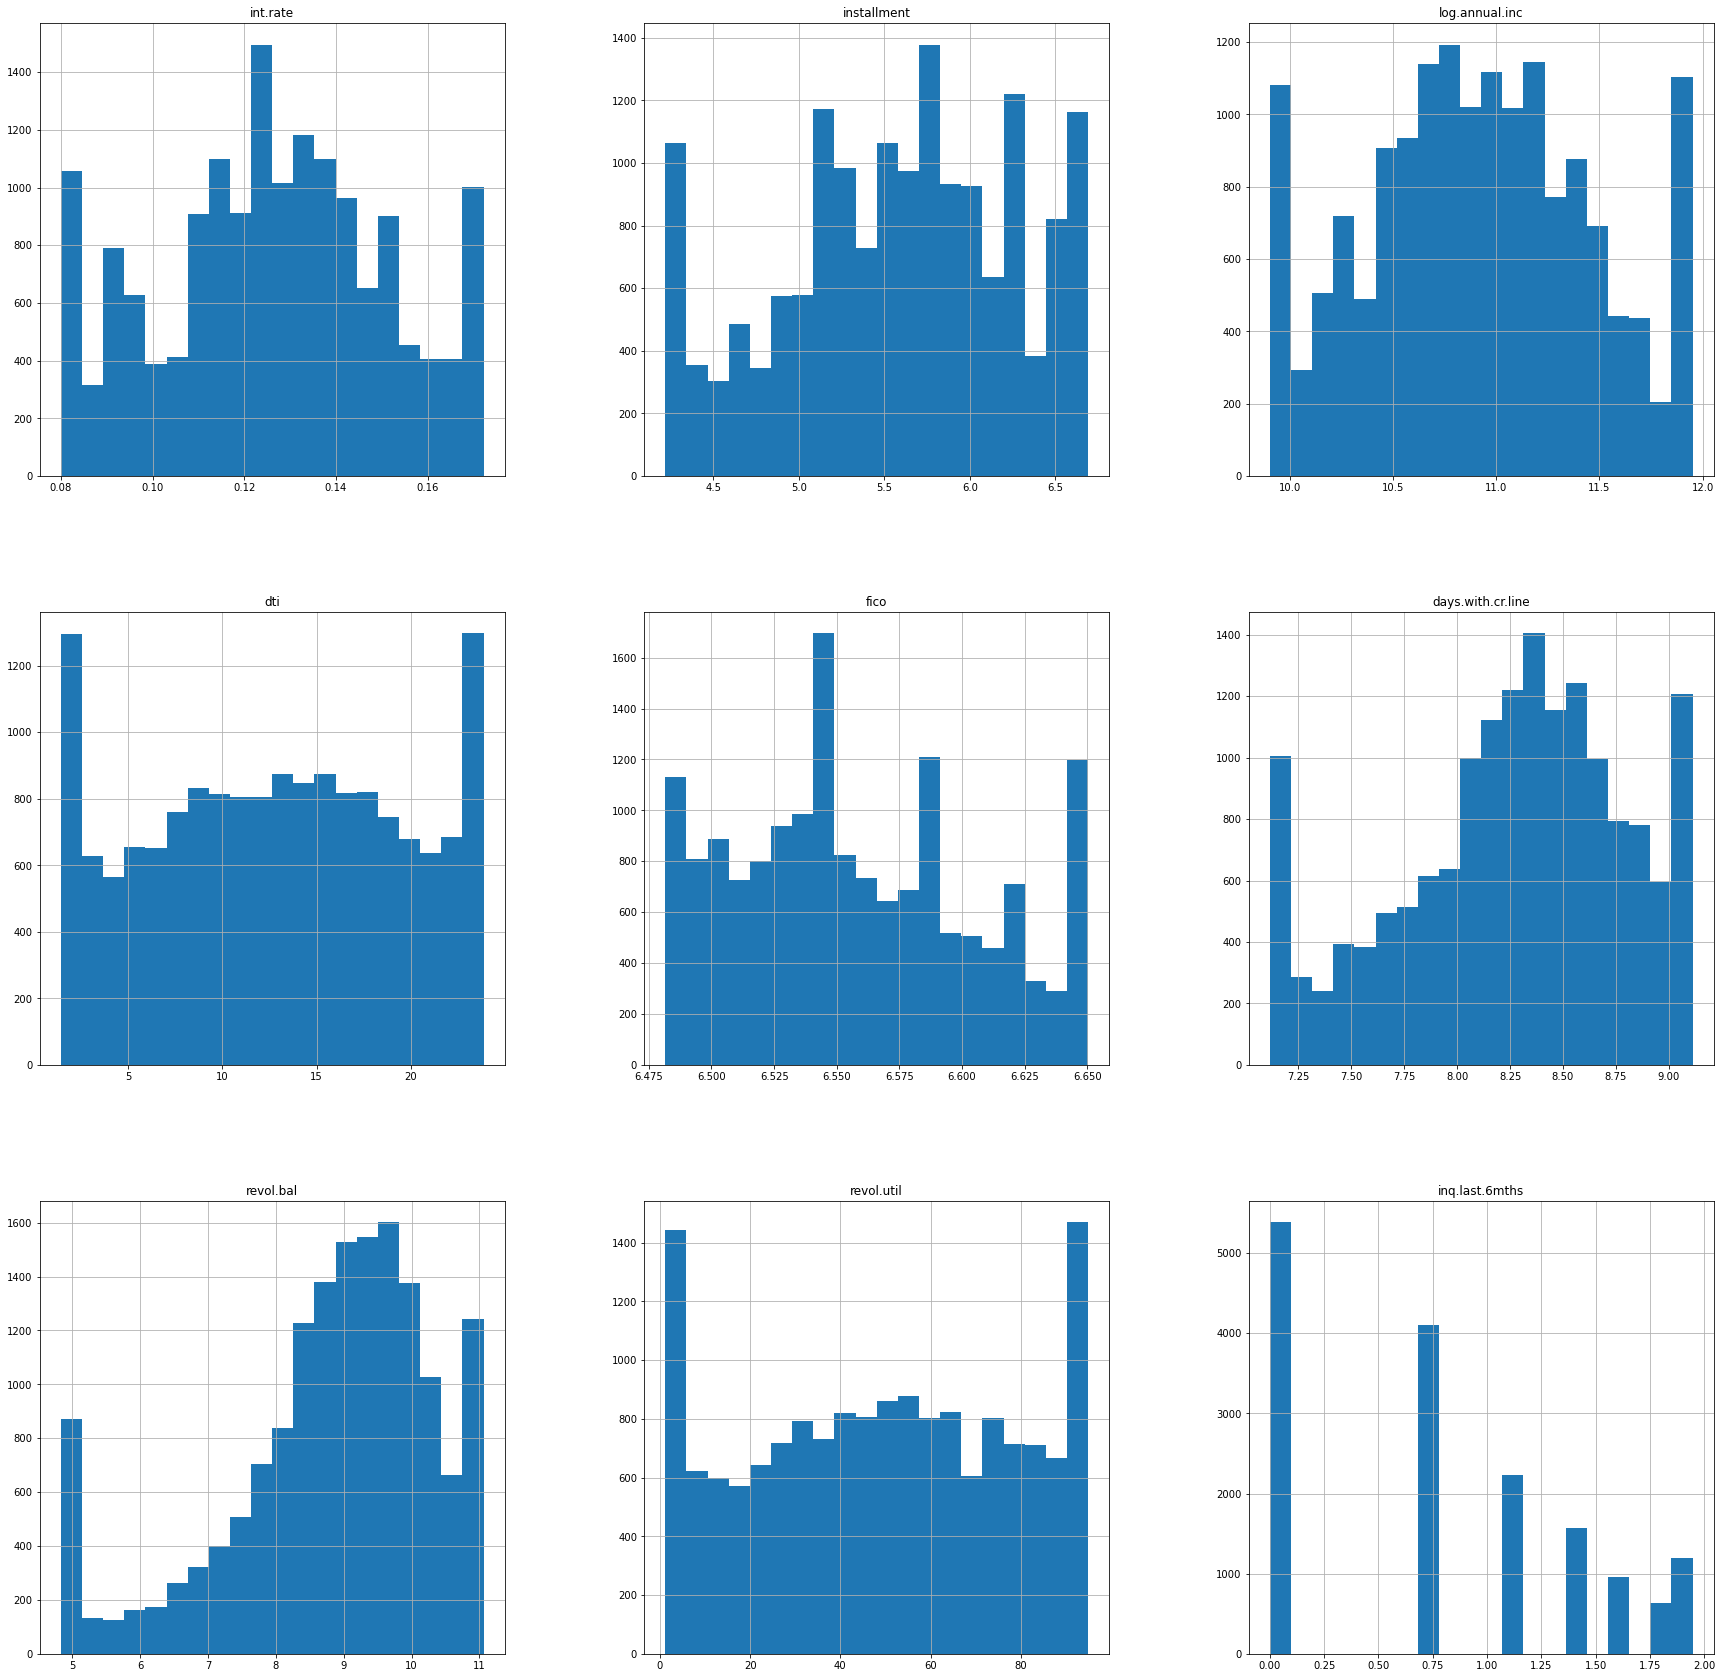

In [932]:
df1[Continious_Features].hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

#### Handle outliers and skewness in categorical features in our dataframe

In [933]:
for feat in Categorical_Features:
    detect_outlier(feat)


outlier caps for credit.policy


KeyboardInterrupt: 

In [934]:
# Capping features in combined_df to remove outliers in categorical features

# Upper bounded outliers for all categorical features except field not.fully.paid since its a Target field

for cat in Categorical_Features:
    df1[cat].clip(upper=df1[cat].quantile(.95), inplace=True)

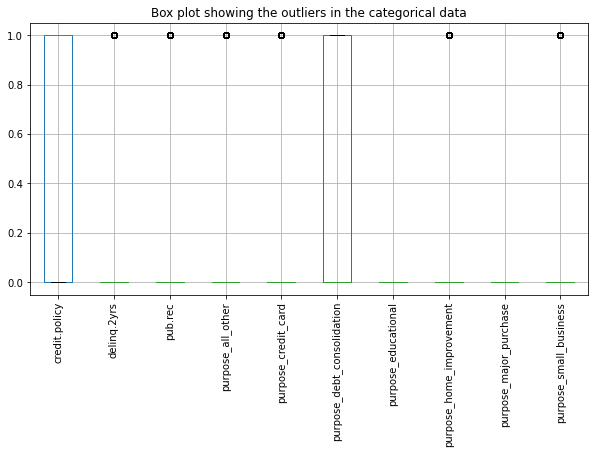

In [935]:
# Check for the presence of outliers in the categorical data of the dataframe again

# Define subplot grid

plt.figure(figsize = (10, 5))
df1[Categorical_Features].boxplot()
plt.xticks(rotation = 90)
plt.title("Box plot showing the outliers in the categorical data")
plt.show()

We can see that the number of outliers in categorical data reduce significantly as compared to the previous case.

# Task 3. Additional Feature Engineering

###	You will check the correlation between features and will drop those features which have a strong correlation

##### Identify the correlations in the numerical data

In [936]:
df1[Continious_Features].corr()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths
int.rate,1.000000,0.237295,0.069361,0.197148,-0.705547,-0.123055,0.113641,0.424309,0.187546
installment,0.237295,1.000000,0.463998,0.045012,0.112828,0.218271,0.312619,0.062016,-0.010521
log.annual.inc,0.069361,0.463998,1.000000,-0.033681,0.110904,0.416661,0.400077,0.069333,0.029073
dti,0.197148,0.045012,-0.033681,1.000000,-0.198169,0.133933,0.361363,0.320789,0.007573
fico,-0.705547,0.112828,0.110904,-0.198169,1.000000,0.255000,-0.073978,-0.483730,-0.190977
days.with.cr.line,-0.123055,0.218271,0.416661,0.133933,0.255000,1.000000,0.335849,0.043338,-0.036832
revol.bal,0.113641,0.312619,0.400077,0.361363,-0.073978,0.335849,1.000000,0.512460,-0.035116
revol.util,0.424309,0.062016,0.069333,0.320789,-0.483730,0.043338,0.512460,1.000000,-0.033777
inq.last.6mths,0.187546,-0.010521,0.029073,0.007573,-0.190977,-0.036832,-0.035116,-0.033777,1.000000


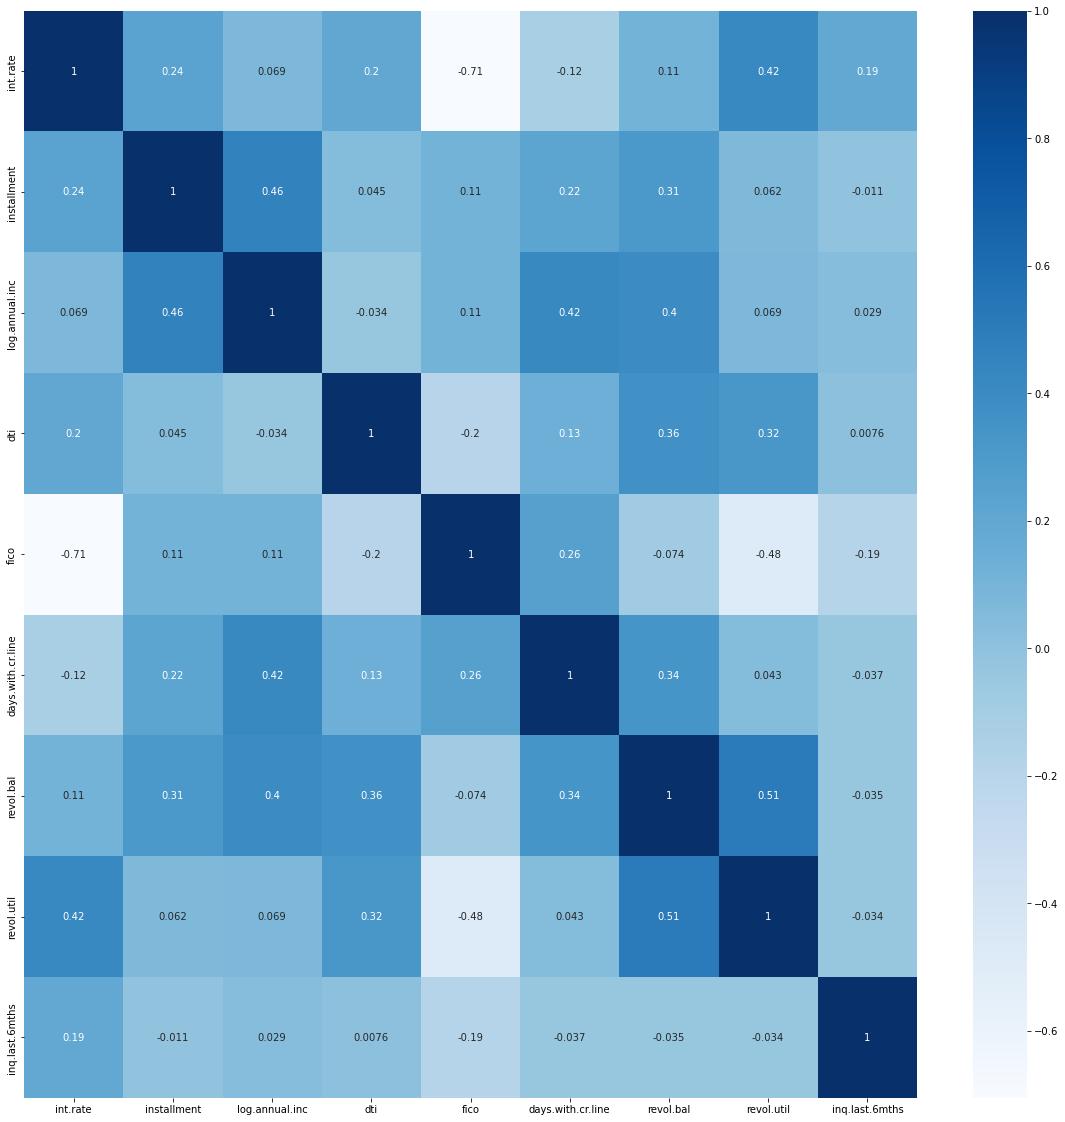

In [937]:
# Generate a correlation
matrix = df1[Continious_Features].corr()
plt.figure(figsize = [20, 20])
sns.heatmap(matrix, annot = True,  fmt = '.2g' ,cbar=True,cmap = "Blues");

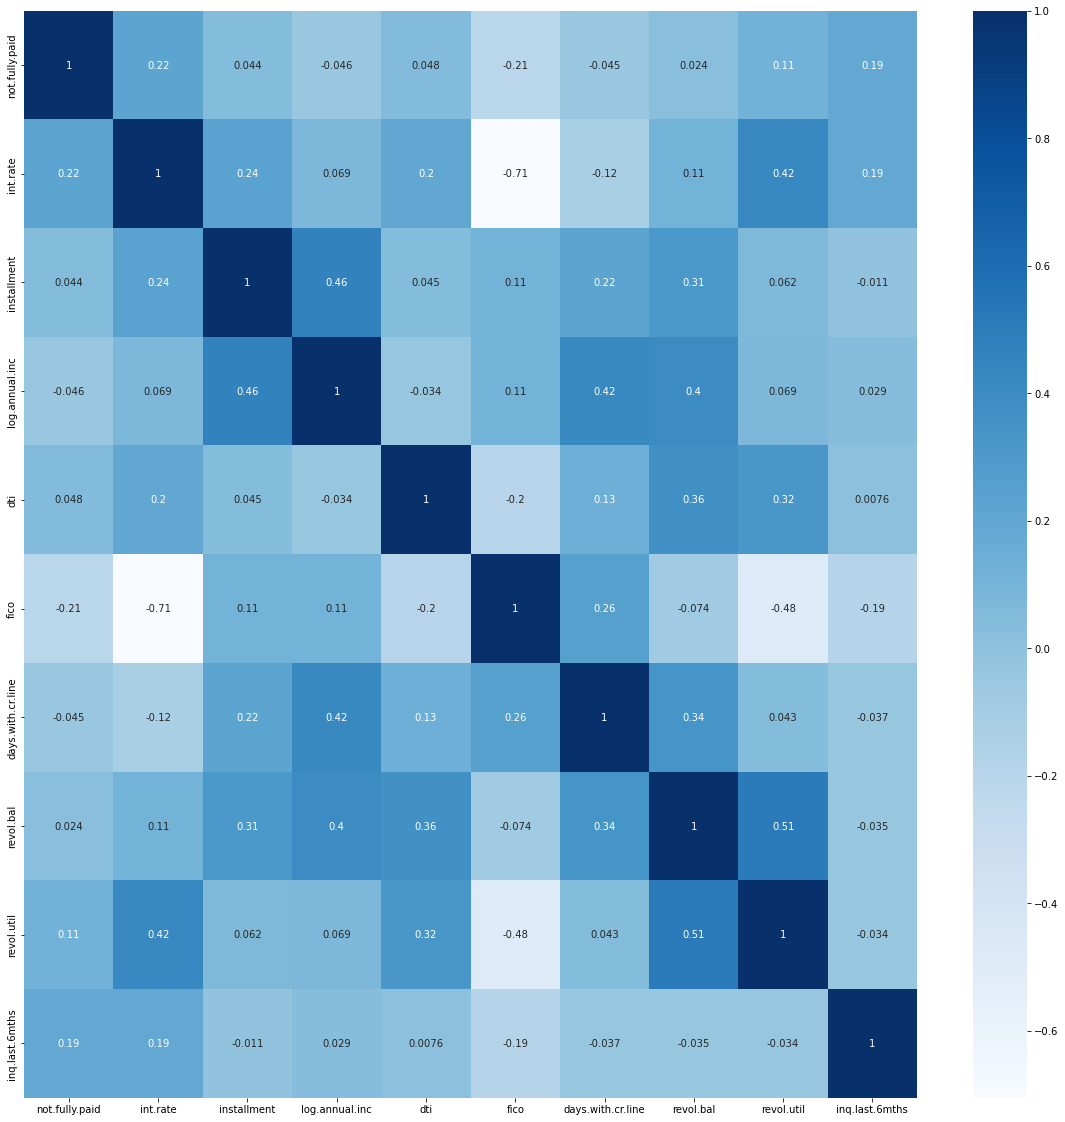

In [940]:
# Generate a correlation
matrix = df1[['not.fully.paid','int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',  'days.with.cr.line',  'revol.bal', 'revol.util', 'inq.last.6mths']].corr()
plt.figure(figsize = [20, 20])
sns.heatmap(matrix, annot = True,  fmt = '.2g' ,cbar=True,cmap = "Blues");

In [943]:
# Select strong correlations among features
cor_pairs = matrix.unstack()
cor_pairs

sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.70]

print(strong_pairs)

fico               int.rate            -0.705547
int.rate           fico                -0.705547
not.fully.paid     not.fully.paid       1.000000
revol.bal          revol.bal            1.000000
days.with.cr.line  days.with.cr.line    1.000000
fico               fico                 1.000000
dti                dti                  1.000000
log.annual.inc     log.annual.inc       1.000000
installment        installment          1.000000
int.rate           int.rate             1.000000
revol.util         revol.util           1.000000
inq.last.6mths     inq.last.6mths       1.000000
dtype: float64


Strong correlations among features is not highly encouragable because it results into a noisy signal in the prediction model which cannot give us clear information about the features that are contributing more to the predictions. As such, features with strong correlations among themselves will be eliminated.

* LassoCV for Feature elimination

In [948]:
from sklearn.linear_model import LassoCV, Lasso

reg = LassoCV()
reg.fit( df1[Continious_Features], df1['not.fully.paid'])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score( df1[Continious_Features], df1['not.fully.paid']))
coef = pd.Series(reg.coef_, index = df1[Continious_Features].columns)

Best alpha using built-in LassoCV: 0.001637
Best score using built-in LassoCV: 0.070945


In [949]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 1 variables


In [951]:
coef

int.rate             0.000000
installment          0.060467
log.annual.inc      -0.068465
dti                  0.000208
fico                -0.676342
days.with.cr.line   -0.000616
revol.bal           -0.006103
revol.util           0.001690
inq.last.6mths       0.132958
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

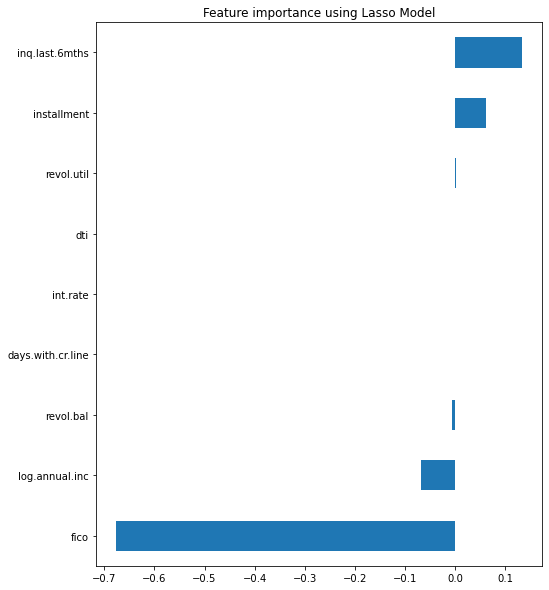

In [950]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

* Feature int.rate is highly co-related to Fico
* As per LassoCV feature Int.rate will be removed

###### Select the best features in categorical data

In [956]:
from sklearn.feature_selection import chi2

# Perform the chi test and determine the f score and the p value
f_p_values = chi2(df1[Categorical_Features], df1['not.fully.paid'])
f_p_values

(array([1.61963327e+02, 5.43772424e+00, 8.76494401e+01, 4.07968127e+00,
        7.70679612e+01, 3.95921796e+00,            nan, 1.17134560e-01,
                   nan, 1.39108844e+02]),
 array([4.21406102e-37, 1.97063289e-02, 7.81466652e-21, 4.34018450e-02,
        1.65175203e-18, 4.66153551e-02,            nan, 7.32163313e-01,
                   nan, 4.16959009e-32]))

Chi-square is used to find F-score and p-values for categorical features. So in this case the first array is for F score and the second array is for p-values.The higher the value of the F score is the more important the feature and the smaller the value of the p-value the more important will be the feature. A p-value less 0.05 indicates that the feature is important.

In [958]:
# Representing the p values in list form
p_values = pd.Series(f_p_values[1])
p_values.index = df1[Categorical_Features].columns
p_values

credit.policy                 4.214061e-37
delinq.2yrs                   1.970633e-02
pub.rec                       7.814667e-21
purpose_all_other             4.340184e-02
purpose_credit_card           1.651752e-18
purpose_debt_consolidation    4.661536e-02
purpose_educational                    NaN
purpose_home_improvement      7.321633e-01
purpose_major_purchase                 NaN
purpose_small_business        4.169590e-32
dtype: float64

In [959]:
# Sorting the p values in ascending order
p_values.sort_values(ascending = True)

credit.policy                 4.214061e-37
purpose_small_business        4.169590e-32
pub.rec                       7.814667e-21
purpose_credit_card           1.651752e-18
delinq.2yrs                   1.970633e-02
purpose_all_other             4.340184e-02
purpose_debt_consolidation    4.661536e-02
purpose_home_improvement      7.321633e-01
purpose_educational                    NaN
purpose_major_purchase                 NaN
dtype: float64

Below categorical features have a p-value that is less than 0.05. These will therefore be taken into consideration for model training as they are seen to mostly influence wether a client will default or not.

credit.policy                 4.214061e-37
purpose_small_business        4.169590e-32
pub.rec                       7.814667e-21
purpose_credit_card           1.651752e-18

In [967]:
df2= df1.copy()

#df1= df2.copy()

##### Train-Test-Split

In [968]:
X=df1.drop(columns= ['int.rate','delinq.2yrs',  'purpose_all_other'  ,'purpose_debt_consolidation' ,'purpose_home_improvement','purpose_educational'  ,'purpose_major_purchase'])
y=df1['not.fully.paid']

In [969]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [970]:
print("X_train : {} \n X_test : {} \n y_train : {} \n y_test : {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train : (12872, 13) 
 X_test : (3218, 13) 
 y_train : (12872,) 
 y_test : (3218,)


#### Feature Scaling

In [971]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape , X_test.shape)

(12872, 13) (3218, 13)


### Modelling

In [973]:
#Modelling With RandomForest Classifier
model_rfc= RandomForestClassifier(n_estimators=600)
model_rfc.fit(X_train,y_train)

NameError: name 'RandomForestClassifier' is not defined

In [972]:
model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[8]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

NameError: name 'keras' is not defined